In [2]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df=quandl.get("FRED/DCOILBRENTEU",start_date="1847-05-01",end_date="2022-10-01")

In [4]:
df1=df1.set_index("date")

d=pd.date_range(start='1/1/2023', end='1/12/2023')

df1=pd.DataFrame(d,columns=["date"])
df1.shape

df1.head()

NameError: name 'df1' is not defined

In [22]:
df.head()

,Value,ma4,ma10
Date,,,
1987-06-03,18.75,18.6275,18.597
1987-06-04,18.78,18.6650,18.609
1987-06-05,18.65,18.7150,18.642
1987-06-08,18.75,18.7150,18.652
1987-06-09,18.78,18.7325,18.667


In [5]:
df.shape

(8887, 1)

In [6]:
df.describe()

,Value
count,8887.000000
mean,47.654745
std,32.402911
min,9.100000
25%,18.985000
50%,36.850000
75%,68.935000
max,143.950000


In [7]:
df.isnull().sum()

Value    0
dtype: int64

<AxesSubplot:xlabel='Date'>

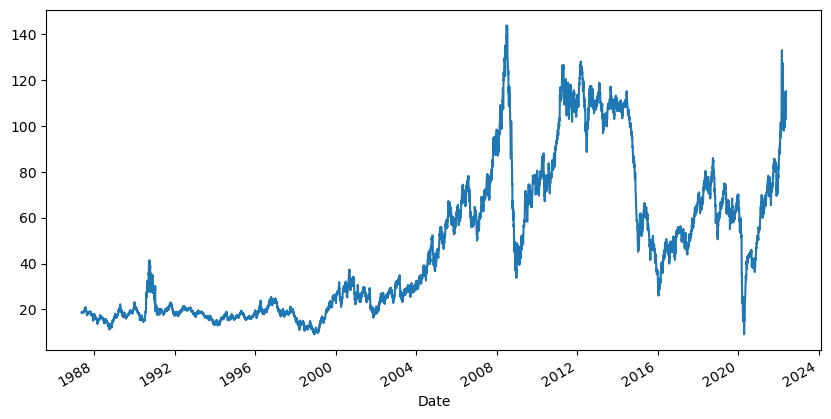

In [8]:
df.Value.plot(figsize=(10,5))

In [9]:
df2=pd.concat([df,df1],axis=0)

df=df2.copy()

NameError: name 'df1' is not defined

In [10]:
#finding the moving average
df["ma4"]=df["Value"].shift(1).rolling(window=4).mean()

In [11]:
df["ma10"]=df["Value"].shift(1).rolling(window=10).mean()

In [12]:
df.tail(20)

,Value,ma4,ma10
Date,,,
2022-04-25,99.27,105.7225,104.564
2022-04-26,102.89,104.1675,104.508
2022-04-27,103.30,103.6275,104.671
2022-04-28,105.78,102.6525,105.209
2022-04-29,108.36,102.8100,105.345
2022-05-03,104.94,105.0825,105.332
2022-05-04,110.53,105.5950,104.743
2022-05-05,112.11,107.4025,105.247
2022-05-06,113.86,108.9850,105.953


In [13]:
df.dropna(axis=0,inplace=True)

In [14]:
df.head()

,Value,ma4,ma10
Date,,,
1987-06-03,18.75,18.6275,18.597
1987-06-04,18.78,18.6650,18.609
1987-06-05,18.65,18.7150,18.642
1987-06-08,18.75,18.7150,18.652
1987-06-09,18.78,18.7325,18.667


In [15]:
#created target variable
x=df[["ma4","ma10"]]
y=df["Value"]

In [16]:
x.head()

,ma4,ma10
Date,,
1987-06-03,18.6275,18.597
1987-06-04,18.6650,18.609
1987-06-05,18.7150,18.642
1987-06-08,18.7150,18.652
1987-06-09,18.7325,18.667


In [17]:
y.head()

Date
1987-06-03    18.75
1987-06-04    18.78
1987-06-05    18.65
1987-06-08    18.75
1987-06-09    18.78
Name: Value, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
model.score(x_test,y_test)

0.9976609453482824

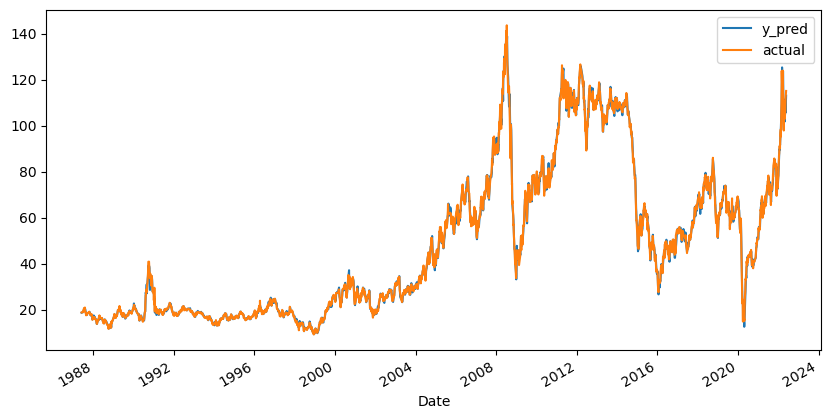

In [21]:
y_pred=model.predict(x_test)
df1=pd.DataFrame(y_pred,index=y_test.index,columns = ["price"])
df1.plot(figsize=(10,5))
y_test.plot()
plt.legend(["y_pred","actual"])
plt.show()